In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
# Read MNIST dataset
train = pandas.read_csv("mnist_train.csv", header = None)
test = pandas.read_csv("mnist_test.csv", header = None)
print(train.shape, test.shape)

(60000, 785) (10000, 785)


In [3]:
# Sparate features and labels
x_train = train.iloc[:,1:] / 255
y_train = train.iloc[:,0]
x_test = test.iloc[:,1:] / 255
y_test = test.iloc[:,0]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [4]:
# Train logistic regression (class probabilities)
model = sklearn.linear_model.LogisticRegression(multi_class = "ovr")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
[list(y_pred[0:25]), list(y_test[0:25])]

C:\Users\young\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4],
 [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4]]

<Axes: >

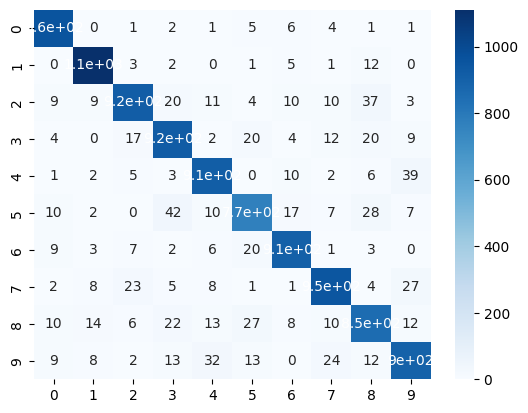

In [5]:
# Compute and plot the confusion matrix
mat = sklearn.metrics.confusion_matrix(y_test, y_pred)
seaborn.heatmap(mat, cmap = "Blues", annot = True)

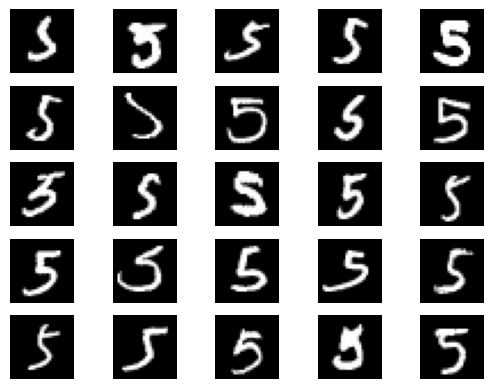

In [6]:
# Plot some images that are predicted incorrectly
fig, axs = plt.subplots(5, 5)
row = 0
for ax in axs.flat:
    while y_test[row] != 5 or y_pred[row] != 3:
        row = row + 1
    ax.imshow(numpy.reshape(x_test.iloc[row], (28, 28)), cmap = "gray")
    ax.set_axis_off()
    row = row + 1